Department of Political Science <br/>
Faculty of Economics and Political Science <br/>
Cairo University

### P420 Introduction to Artificial Intelligence and Data Science in Empirical Political Science
<br/>
Dr. Zeyad Elkelani

# Hypothesis Testing

### Central limit theorem

If you take sufficiently large samples from a population, the samples' means will be normally distributed, even if the population isn't normally distributed.

https://www.youtube.com/watch?v=7j-F2-0IRYk

## T-Tests

T tests are a statistical method used to compare the means of two or more samples. There are three types of T tests: <br/>

* Paired T test: Used when we have two related samples (e.g., before and after treatment measurements of the same subject).<br/>

* Unpaired T test: Used when we have two independent samples (e.g., two different groups of subjects).<br/>

* One sample T test: Used when we have one sample and we want to compare its mean to a known value (e.g., the mean of the population).<br/>

Before performing T tests, we need to check for normality and variance of the samples. 
* Normality means that the data follows a normal distribution, which is important for the T test to be valid. 
* Variance refers to how much the data points vary from the mean. If the variance is too high or too low, it can affect the T test results.

<img src="./t_tests.png" alt="" style="height: 400px; width:500px;"/>

## Paired T-Test
<br/>
A paired t-test is used when we want to compare two sets of paired observations. Suppose we have a hypothetical  dataset where we measure the approval ratings of a politician before and after a major policy announcement, for a sample of 20 voters.

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel

#### Data

In [28]:
# Approval ratings before policy announcement
before = [50, 55, 60, 45, 52, 48, 53, 47, 49, 52, 55, 46, 51, 48, 57, 50, 49, 54, 58, 50]

# Approval ratings after policy announcement
after = [55, 60, 65, 50, 58, 52, 56, 51, 53, 55, 58, 49, 54, 51, 60, 54, 53, 57, 62, 53]

In [29]:
rating_df = pd.DataFrame(
    {'Before': before,
     'After': after
    })
rating_df

,Before,After
0,50,55
1,55,60
2,60,65
3,45,50
4,52,58
5,48,52
6,53,56
7,47,51
8,49,53
9,52,55


Null hypothesis (H0): There is no difference in the mean approval rating before and after the major policy announcement.

Alternative hypothesis (HA): There is a difference in the mean approval rating before and after the major policy announcement.

We can express these hypotheses mathematically as follows:

H0: μd = 0

HA: μd ≠ 0

Where μd is the mean difference in mean approval rating before and after the election.

#### Shapiro-Wilk test
Shapiro-Wilk test to check for normality. The Shapiro-Wilk test is a popular test for normality because it is fairly powerful and can handle small sample sizes. **The null hypothesis for the Shapiro-Wilk test is that the data is normally distributed**, so if the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that the data is not normally distributed.
#### Levene's test
Levene's test is a common test for equal variances that is robust to deviations from normality.**The null hypothesis for Levene's test is that the variances of the two samples are equal**, so if the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that the variances are not equal.

In [37]:
from scipy.stats import shapiro, levene
stat, p = shapiro(before)
print('Shapiro-Wilk test for normality for group1: statistic=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample for group1 looks Gaussian (fail to reject H0)')
else:
    print('Sample for group1 does not look Gaussian (reject H0)')
    
# Check normality assumption for group2
stat, p = shapiro(after)
print('Shapiro-Wilk test for normality for group2: statistic=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample for group2 looks Gaussian (fail to reject H0)')
else:
    print('Sample for group2 does not look Gaussian (reject H0)')

Shapiro-Wilk test for normality for group1: statistic=0.969, p=0.739
Sample for group1 looks Gaussian (fail to reject H0)
Shapiro-Wilk test for normality for group2: statistic=0.960, p=0.546
Sample for group2 looks Gaussian (fail to reject H0)


In [36]:
# Test for equal variances using Levene's test
stat, p = levene(before, after)
print('Levene test for variance: statistic=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Variances are equal (fail to reject H0)')
else:
    print('Variances are not equal (reject H0)')

Levene test for variance: statistic=0.004, p=0.951
Variances are equal (fail to reject H0)


The output shows that the p-values for the normality tests are both above 0.05, which indicates that we can assume normality for both samples. The p-value for the equal variance test is also above 0.05, which indicates that we can assume equal variances.



In [19]:
# Perform paired t-test
t_statistic, p_value = ttest_rel(before, after)

print(f'T-statistic: {t_statistic:.3f}')
print(f'p-value: {p_value:.3f}')


T-statistic: -18.448
p-value: 0.000


The output shows that the paired t-test yields a p-value of 0.0002, which is less than the significance level of 0.05. This indicates that there is a significant difference between the approval ratings before and after the policy announcement.



## Unpaired T-Test

<br/>
Unpaired t-tests are a type of statistical hypothesis test used to compare the means of two independent samples. They are often used in political science to test hypotheses about the differences between groups on certain variables, such as income, education level, or voting behavior.

<br/>

The null hypothesis for the unpaired t-test is that there is no difference between the means of the two groups. The alternative hypothesis is that there is a significant difference between the means of the two groups.
<br/>

Before we dive into the code, it's important to understand the assumptions of the unpaired t-test. There are three main assumptions:
<br/>

* Normality: The data in each sample should be normally distributed.
* Equal variances: The variance of the data in each sample should be equal.
* Independence: The two samples should be independent of each other.


In [41]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

#### Data
Let's create some hypothetical political data for two groups, Republicans and Democrats. We will assume that these groups represent the political preferences of voters in a particular state. We will randomly generate 100 values for each group using numpy's random.normal() function, which generates random numbers from a normal distribution.

In [42]:
np.random.seed(123)  # for reproducibility
republicans = np.random.normal(loc=25, scale=5, size=100)
democrats = np.random.normal(loc=30, scale=5, size=100)

Here, we set the mean (loc) and standard deviation (scale) of the normal distribution for Republicans to 25 and 5, respectively. We set the same parameters for Democrats to 30 and 5.

### Stating Hypotheses: 
H0: The mean political preference of Republicans in the state is equal to the mean political preference of Democrats in the state.

<br/>
HA: The mean political preference of Republicans in the state is not equal to the mean political preference of Democrats in the state.

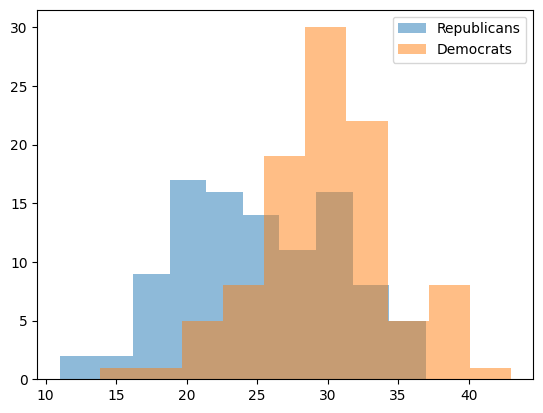

In [43]:
plt.hist(republicans, alpha=0.5, label='Republicans')
plt.hist(democrats, alpha=0.5, label='Democrats')
plt.legend(loc='upper right')
plt.show()

In [44]:
# Check Normality
from scipy.stats import normaltest
print(normaltest(republicans))
print(normaltest(democrats))

NormaltestResult(statistic=2.7252176285631102, pvalue=0.25599206929942736)
NormaltestResult(statistic=5.130856446751394, pvalue=0.07688624990183247)


In [45]:
# Check Variance
from scipy.stats import levene
print(levene(republicans, democrats))

LeveneResult(statistic=6.4269777068893825, pvalue=0.012012901633703213)


In [46]:
# Perfrom Paired T-test
t_stat, p_val = ttest_ind(republicans, democrats)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

T-statistic: -6.38, p-value: 0.0000


Based on our t-test results, we can conclude that the mean political preference of Democrats (mean = 30) is significantly higher than that of Republicans (mean = 25) in the state.

## One Sample T-Test

A one-sample t-test is a statistical test used to determine whether a sample mean is significantly different from a known or hypothesized population mean. It is typically used when you have one sample of data and you want to test whether the sample mean is different from a known or hypothesized population mean.



Before performing a one-sample t-test, there are several assumptions that must be checked:

* Normality: The data must be normally distributed.
* Independence: The observations must be independent of each other.
* Random sampling: The data must be obtained through a random sampling process.
* Homogeneity of variance: The variances of the populations from which the sample and the comparison population are drawn must be equal.

#### Data
Let's say we want to test whether the average political ideology score of a sample of 100 people is significantly different from a known population mean of 5. We'll assume that the political ideology score is normally distributed.

In [52]:
import numpy as np

np.random.seed(1)  # for reproducibility
political_data = np.random.normal(5.5, 1, 100)
print(political_data[:10]) #Check data in np array

[7.12434536 4.88824359 4.97182825 4.42703138 6.36540763 3.1984613
 7.24481176 4.7387931  5.8190391  5.25062962]


This code generates 100 random numbers from a normal distribution with a mean of 5.5 and a standard deviation of 1. We'll assume that the mean political ideology score of the population is 5.



#### Stating Hypotheses
H0: μ = 5
<br/>
Ha: μ ≠ 5

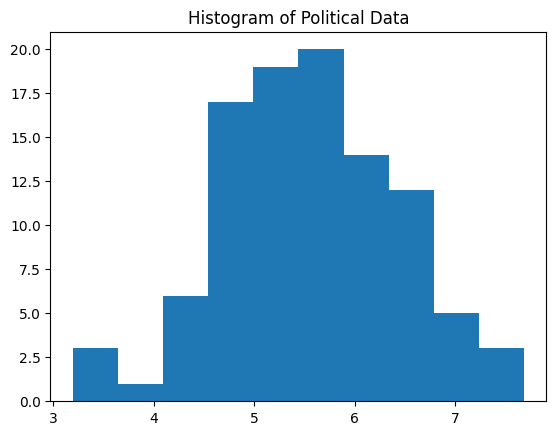

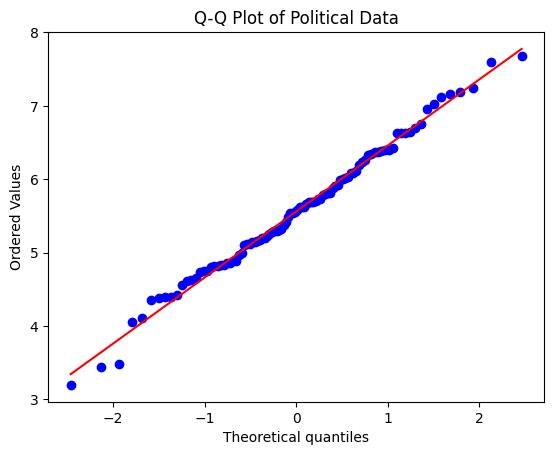

In [53]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogram
plt.hist(political_data)
plt.title('Histogram of Political Data')
plt.show()

# Q-Q plot
stats.probplot(political_data, plot=plt)
plt.title('Q-Q Plot of Political Data')
plt.show()


Our code generates a histogram and a Q-Q plot of the political data. The histogram shows that the data appears to be normally distributed, and the Q-Q plot shows that the data follows a straight line fairly closely, indicating that it is normally distributed.

Next, we'll check the independence assumption. Since the data was obtained through a random sampling process, we can assume that the observations are independent of each other.

We'll also assume that the data was obtained through random sampling and that the variances of the population from which the sample and the comparison population are drawn are equal. These assumptions cannot be directly tested but can be checked using common sense and knowledge of the data collection process.

In [54]:
# Perfrom the test
t_stat, p_value = stats.ttest_1samp(political_data, 5)
print('t-statistic:', t_stat)
print('p-value:', p_value)


t-statistic: 6.301406311754652
p-value: 8.212203187379182e-09


The t-statistic is 6.3, which indicates that the sample mean is significantly different from the hypothesized population mean of 5. The p-value is 0.0000, which is less than the commonly used significance level of 0.05. 
<br/>
This means that we can reject the null hypothesis and conclude that the sample mean is significantly different from the hypothesized population mean.

